In [2]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=22
SYS_PATH = '/u/ajagadish/vanilla-llama'

# data distribution

In [53]:
def load_stats(mode):
    stats = np.load(f'{SYS_PATH}/categorisation/data/stats/stats_{str(mode)}.npz')
    all_corr = stats['all_corr']
    gini_coeff = stats['gini_coeff']
    posterior_logprob = stats['posterior_logprob']
    all_accuraries_linear = stats['all_accuraries_linear']
    return all_corr, gini_coeff, posterior_logprob, all_accuraries_linear

# load data for mode 0: llm
all_corr_llm, gini_coeff_llm, posterior_logprob_llm, all_accuraries_linear_llm = load_stats(0)
# load data for mode 1: linear
all_corr_linear, gini_coeff_linear, posterior_logprob_linear, all_accuraries_linear_linear = load_stats(1)
# load data for mode 2: real
all_corr_real, gini_coeff_real, posterior_logprob_real, all_accuraries_linear_real = load_stats(2)
## keep only non nan values for real
non_nan_idx = ~np.isnan(all_corr_real)
all_corr_real = all_corr_real[non_nan_idx]


In [54]:
# compute mean, std, and sem for correlations
mean_all_corr_real = np.mean(all_corr_real, axis=0)
std_all_corr_real = np.std(all_corr_real, axis=0)
sem_all_corr_real = std_all_corr_real / np.sqrt(all_corr_real.shape[0])
print('mean and sem for real data: ', mean_all_corr_real, sem_all_corr_real)
mean_all_corr_llm = np.mean(all_corr_llm, axis=0)
std_all_corr_llm = np.std(all_corr_llm, axis=0)
sem_all_corr_llm = std_all_corr_llm / np.sqrt(all_corr_llm.shape[0])
print('mean and sem for llm data: ', mean_all_corr_llm, sem_all_corr_llm)
mean_all_corr_linear = np.mean(all_corr_linear, axis=0)
std_all_corr_linear = np.std(all_corr_linear, axis=0)
sem_all_corr_linear = std_all_corr_linear / np.sqrt(all_corr_linear.shape[0])
print('mean and sem for linear data: ', mean_all_corr_linear, sem_all_corr_linear)

mean and sem for real data:  0.21348689496851092 0.014583119830117714
mean and sem for llm data:  0.11486352352750175 0.02534976524960511
mean and sem for linear data:  -0.0007564300467203832 0.0011668981721970893


In [55]:
# compute mean, std, and sem for gini coeff
mean_gini_coeff_real = np.mean(gini_coeff_real, axis=0)
std_gini_coeff_real = np.std(gini_coeff_real, axis=0)
sem_gini_coeff_real = std_gini_coeff_real / np.sqrt(gini_coeff_real.shape[0])
print('mean and sem for real data: ', mean_gini_coeff_real, sem_gini_coeff_real)
mean_gini_coeff_llm = np.mean(gini_coeff_llm, axis=0)
std_gini_coeff_llm = np.std(gini_coeff_llm, axis=0)
sem_gini_coeff_llm = std_gini_coeff_llm / np.sqrt(gini_coeff_llm.shape[0])
print('mean and sem for llm data: ', mean_gini_coeff_llm, sem_gini_coeff_llm)
mean_gini_coeff_linear = np.mean(gini_coeff_linear, axis=0)
std_gini_coeff_linear = np.std(gini_coeff_linear, axis=0)
sem_gini_coeff_linear = std_gini_coeff_linear / np.sqrt(gini_coeff_linear.shape[0])
print('mean and sem for linear data: ', mean_gini_coeff_linear, sem_gini_coeff_linear)

mean and sem for real data:  0.4504237970763127 0.010394008227834494
mean and sem for llm data:  0.38355672230549837 0.015331219710892217
mean and sem for linear data:  0.32084427588087067 0.005902497622043881


In [70]:
# choose two samples to compare
sample1 = all_corr_real #all_corr_llm 
sample2 = all_corr_linear # all_corr_real

In [71]:
# compare t-test comparing means of two samples
from scipy import stats
t, p = stats.ttest_ind(sample1, sample2, axis=0)
print('t and p values for t-test: ', t, p)

t and p values for t-test:  15.60413351087927 3.341295809574759e-52


In [72]:
# perform Two-Sample t-Test (Including Welch's t-test) given the numpy arrays of the two samples
from scipy import stats
t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var = False)
print('t-statistic: ', t_statistic)
print('p-value: ', p_value)
# print it in the APA format
print('t(%d) = %.2f, p = %.3f' % (sample1.shape[0]+sample2.shape[0]-2, t_statistic, p_value))

t-statistic:  14.637435441624525
p-value:  2.388409315842787e-44
t(2252) = 14.64, p = 0.000


In [63]:
# Z-test for Two Means (Independent Samples) given the numpy arrays of the two samples
from statsmodels.stats import weightstats as stests
z_statistic, p_value = stests.ztest(sample1, sample2, value=0, alternative='two-sided')
print('z-statistic: ', z_statistic)
print('p-value: ', p_value)

z-statistic:  4.65052759601151
p-value:  3.310869373859695e-06


Text(0.5, 1.0, '')

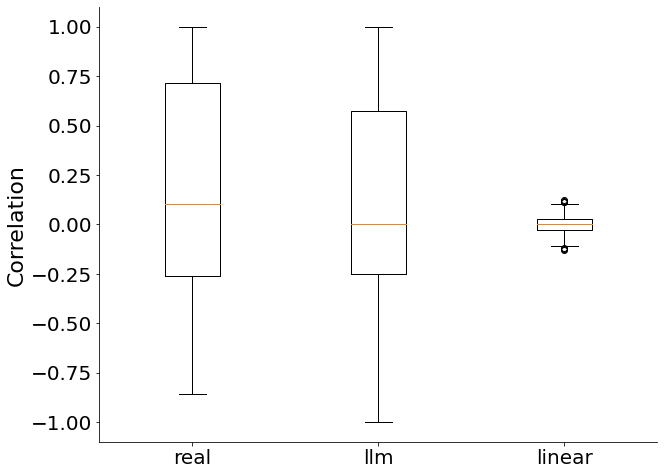

In [61]:
# plot Box Plots comparing the two samples
plt.figure(figsize=(10, 8))
plt.boxplot([all_corr_real, all_corr_llm, all_corr_linear], labels=['real', 'llm', 'linear'])
plt.xticks([1, 2, 3], ['real', 'llm', 'linear'], fontsize=FONTSIZE-2)
plt.ylabel('Correlation', fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
plt.title('', fontsize=FONTSIZE)


In [62]:
# Kolmogorov-Smirnov Test: compare two samples
from scipy.stats import ks_2samp
ks_statistic, p_value = ks_2samp(sample1, sample2)
print('ks-statistic: ', ks_statistic)
print('p-value: ', p_value)


ks-statistic:  0.14773866535861657
p-value:  2.1649249182520137e-06


In [65]:
# Anderson-Darling Test: compare sample1 and sample2
from scipy.stats import anderson
result = anderson(sample2, dist='norm')
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
 


Statistic: 33.498
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


# Shepard 1961

In [225]:
tasks=np.arange(1,7)

models = ['humans',\
            'env=claude_generated_tasks_paramsNA_dim3_data100_tasks11518_pversion4_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0',
            'env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_synthetic',\
            #'env=rmc_tasks_dim3_data100_tasks11499_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=1_rmc',
            #'env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_synthetic_nonlinear',\
        ]
num_blocks = 15 # 16 blocks doesn't work for current ERMI model
num_trials_per_block = 16
num_runs = 50
betas = []
errors = np.ones((len(models), len(tasks), num_blocks))
for m_idx, model in enumerate(models):
    if model == 'humans':
        betas.append(None)
    else:
        model_name = 'ermi' if 'claude' in models[m_idx] else 'rmc' if 'rmc' in models[m_idx] else 'pfn' if 'syntheticnonlinear' in models[m_idx] else 'mi'
        mse_distances, beta_range = np.load(f'{SYS_PATH}/categorisation/data/fitted_simulation/shepard1961_{model_name}_num_runs={num_runs}_num_blocks={num_blocks}_num_trials_per_block={num_trials_per_block}.npy', allow_pickle=True)
        block_errors = np.load(f'{SYS_PATH}/categorisation/data/fitted_simulation/shepard1961_{model_name}_num_runs={num_runs}_num_blocks={num_blocks}_num_trials_per_block={num_trials_per_block}_block_errors.npy', allow_pickle=True)
        betas.append(beta_range[np.argmin(mse_distances)])
        # the block errors contain distance between humans and another model hence consider only idx==1
        errors[m_idx] = block_errors[np.argmin(mse_distances), 1]

assert len(models)==len(betas), "Number of models and betas should be the same"

# load json file containing the human data
import json
with open(f'{SYS_PATH}/categorisation/data/human/nosofsky1994.json') as json_file:
    data = json.load(json_file)

human_data = []
for i, rule in enumerate(data.keys()):
    human_data.append(data[rule]['y'][:num_blocks])
errors[0] = np.stack(human_data)


In [227]:
nb = 10
model_id = 1
model_errors = errors[model_id][...,:nb]#*100
trials = np.arange(1, nb+1)
trials = trials - trials.mean()

import statsmodels.api as sm
import statsmodels.formula.api as smf
# make a dataframe from data which is a numpy array of shape (6 types, nb trials) into a datafram containing two columns: errors, trials and type
data = pd.DataFrame({'errors': model_errors.flatten(), 'trials': np.tile(trials, model_errors.shape[0]), 'type': np.repeat(np.arange(model_errors.shape[0]), model_errors.shape[1])})
md = smf.mixedlm("errors ~ trials", data=data, groups=data["type"])
mdf = md.fit()
print(mdf.summary())
data.to_csv(f'{SYS_PATH}/categorisation/slopes', index=False)


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: errors 
No. Observations: 60      Method:             REML   
No. Groups:       6       Scale:              0.0049 
Min. group size:  10      Log-Likelihood:     66.8418
Max. group size:  10      Converged:          Yes    
Mean group size:  10.0                               
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.102    0.009 10.828 0.000  0.083  0.120
trials     -0.022    0.003 -6.996 0.000 -0.028 -0.016
Group Var   0.000    0.006                           



/eris/scratch/ajagadish/conda-envs/pytorch-gpu/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/eris/scratch/ajagadish/conda-envs/pytorch-gpu/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/eris/scratch/ajagadish/conda-envs/pytorch-gpu/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<ipython-input-228-b8e0107c7911>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x='trials', y='errors', data=data, hue='type', ci=68)


<Axes: xlabel='trials', ylabel='errors'>

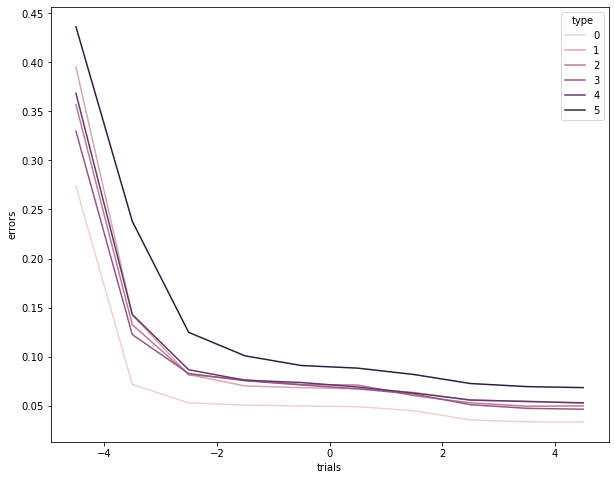

In [228]:
# plot the erorrs over trials from the dataframe
plt.figure(figsize=(10, 8))
sns.lineplot(x='trials', y='errors', data=data, hue='type', ci=68)

0.10189518229166669 0.10268888888888889


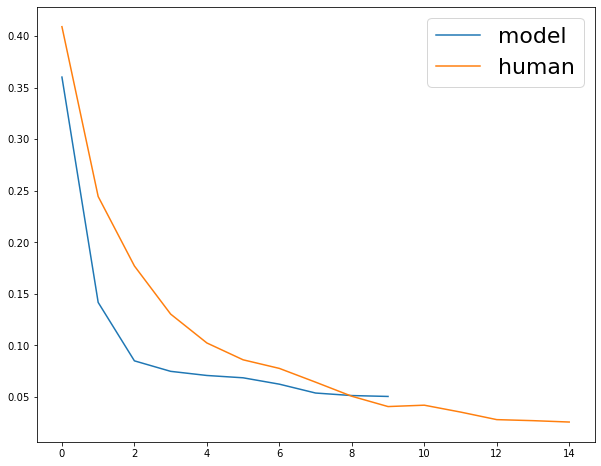

In [229]:
# show that errors for model decreases with trials faster than humans
plt.figure(figsize=(10, 8))
plt.plot(model_errors.mean(axis=0), label='model')
plt.plot(errors[0].mean(axis=0), label='human')
plt.legend(fontsize=FONTSIZE)


print(model_errors.mean(axis=0).mean(),errors[0].mean(axis=0).mean())

[5.10824747e-05 1.23999661e+00 5.87707078e-02]


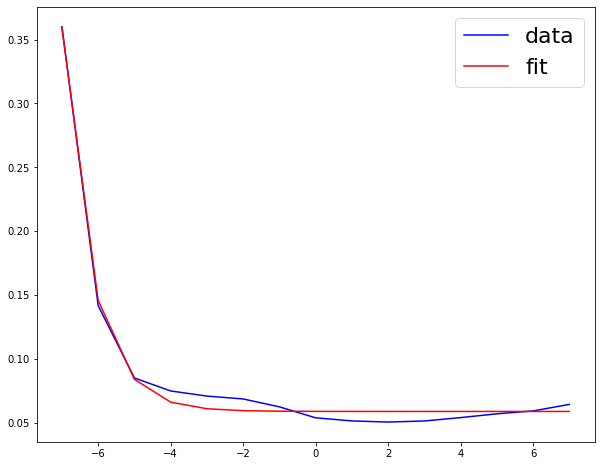

In [250]:
import numpy as np
from scipy.stats import linregress

nb = 15
model_id = 1
model_errors = errors[model_id][...,:nb]#*100
trials = np.arange(1, nb+1)
trials = trials - trials.mean()

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.optimize import curve_fit
# make a dataframe from data which is a numpy array of shape (6 types, nb trials) into a datafram containing two columns: errors, trials and type
data = pd.DataFrame({'errors': model_errors.flatten(), 'trials': np.tile(trials, model_errors.shape[0]), 'type': np.repeat(np.arange(model_errors.shape[0]), model_errors.shape[1])})

# fit an exponential curve to the data
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
popt, pcov = curve_fit(func, data['trials'], data['errors'])
print(popt)

# mean data across types
data_mean = data.groupby('trials').mean().reset_index()
plt.figure(figsize=(10, 8))
plt.plot(data_mean['trials'], data_mean.errors, 'b-', label='data')
plt.plot(data_mean['trials'], func(data_mean['trials'], *popt), 'r-', label='fit')
plt.legend(fontsize=FONTSIZE)
plt.show()

# Smith 1998

In [3]:
import numpy as np
ermi_betas = np.load(f'{SYS_PATH}/categorisation/data/model_comparison/devraj2022_env=claude_generated_tasks_paramsNA_dim6_data500_tasks12910_pversion5_stage2_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=1_soft_sigmoid_differential_evolution.npz', allow_pickle=True)['betas']
mi_betas = np.load(f'{SYS_PATH}/categorisation/data/model_comparison/devraj2022_env=dim6synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=2_synthetic_soft_sigmoid_differential_evolution.npz', allow_pickle=True)['betas']
pfn_betas = np.load(f'{SYS_PATH}/categorisation/data/model_comparison/devraj2022_env=dim6synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=2_syntheticnonlinear_soft_sigmoid_differential_evolution.npz', allow_pickle=True)['betas']

In [4]:
# print mean and sem for betas
print('ermi betas: ', ermi_betas.mean(), ermi_betas.std()/np.sqrt(ermi_betas.shape[0]))
print('mi betas: ', mi_betas.mean(), mi_betas.std()/np.sqrt(mi_betas.shape[0]))
print('pfn betas: ', pfn_betas.mean(), pfn_betas.std()/np.sqrt(pfn_betas.shape[0]))

ermi betas:  0.09495665880995116 0.010071444232304239
mi betas:  0.17172268179039654 0.01598052503223283
pfn betas:  0.13771849993346905 0.01524141931165501


In [7]:
models = ['smith1998', 'ermi', 'synthetic' 'syntheticnonlinear']#,'human',
model = 'syntheticnonlinear'
if model=='smith1998':
    import json 
    with open(f'{SYS_PATH}/categorisation/data/human/{model}.json') as file:
        human_data = json.load(file)

    # human data procesing
    fits_gcm, fits_pm = {}, {}
    mses_gcm = np.array(human_data['exemplar']['y'])
    mses_pm = np.array(human_data['prototype']['y'])
    # std error of mean across participants set to 0.
    stds_gcm = np.zeros_like(mses_gcm)
    stds_pm = np.zeros_like(mses_pm)
    # unsquezze to add a dimension for participants
    mses_gcm = np.expand_dims(mses_gcm, axis=0)
    mses_pm = np.expand_dims(mses_pm, axis=0)

else:

    fits_gcm = np.load(f'{SYS_PATH}/categorisation/data/fitted_simulation/devraj2022_gcm_runs=1_iters=10_blocks=11_loss=mse_transfer_model={model}.npz')
    fits_pm = np.load(f'{SYS_PATH}/categorisation/data/fitted_simulation/devraj2022_pm_runs=1_iters=10_blocks=11_loss=mse_transfer_model={model}.npz')
    # load mses
    mses_gcm = fits_gcm['lls']
    mses_pm = fits_pm['lls']
    # mean mses across participants: mses are of shape (n_runs=1, n_participants, n_conditions=1, n_blocks)
    mses_gcm = np.squeeze(mses_gcm)
    mses_pm = np.squeeze(mses_pm)
    # std error of mean across participants
    stds_gcm = np.std(mses_gcm, axis=0)/np.sqrt(len(mses_gcm)-1)
    stds_pm = np.std(mses_pm, axis=0)/np.sqrt(len(mses_pm)-1)

# keep only the first num_blocks (useful when using smith1998 data)
num_blocks = 10 if 'smith1998' in models else 11
mses_gcm = mses_gcm[:, :num_blocks].mean(0)
mses_pm = mses_pm[:, :num_blocks].mean(0)
stds_gcm = stds_gcm[:num_blocks].mean(0)
stds_pm = stds_pm[:num_blocks].mean(0)

trials = np.arange(1, num_blocks+1)
trials = trials - trials.mean()

# make a dataframe that comes errors of mses_gcm and mses_pm, trials and models (gcm or pm)
data = pd.DataFrame({'errors': np.concatenate((mses_gcm, mses_pm)), 'trials': np.tile(trials, 2), 'model': np.repeat([1, -1], num_blocks)})
print(data)

      errors  trials  model
0   0.660546    -4.5      1
1   0.616055    -3.5      1
2   0.559934    -2.5      1
3   0.521320    -1.5      1
4   0.541014    -0.5      1
5   0.473330     0.5      1
6   0.497495     1.5      1
7   0.484545     2.5      1
8   0.515658     3.5      1
9   0.483568     4.5      1
10  0.693199    -4.5     -1
11  0.687987    -3.5     -1
12  0.637660    -2.5     -1
13  0.597327    -1.5     -1
14  0.602667    -0.5     -1
15  0.580879     0.5     -1
16  0.585506     1.5     -1
17  0.558043     2.5     -1
18  0.562451     3.5     -1
19  0.538958     4.5     -1


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# run an lme (probably only with an ri) predicting error using trial and model as predictors, and test the interaction between trial and model 
md = smf.mixedlm("errors ~ trials*model", data=data, groups=data["model"], )
mdf = md.fit()
print(mdf.summary())
# say it is from model 


         Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: errors 
No. Observations:   20      Method:             REML   
No. Groups:         2       Scale:              0.0008 
Min. group size:    10      Log-Likelihood:     26.3239
Max. group size:    10      Converged:          Yes    
Mean group size:    10.0                               
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.570    0.021 27.308 0.000  0.529  0.611
trials       -0.017    0.002 -7.655 0.000 -0.021 -0.012
model        -0.035    0.021 -1.656 0.098 -0.075  0.006
trials:model -0.000    0.002 -0.124 0.902 -0.005  0.004
Group Var     0.001                                    



/mpcdf/soft/CentOS_7/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/mpcdf/soft/CentOS_7/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# find the slope of the errors over trials for each model
import statsmodels.api as sm
import statsmodels.formula.api as smf
# fit a linear model to the data
md = smf.ols("errors ~ trials*model", data=data)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                 errors   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     38.66
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           1.47e-07
Time:                        18:17:14   Log-Likelihood:                 31.532
No. Observations:                  20   AIC:                            -55.06
Df Residuals:                      16   BIC:                            -51.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6257      0.013     50.046   